Create Word Embedding using pytorch ligthning

Import


In [1]:
import torch
import torch.nn as nn

from torch.optim import Adam
from torch.distributions.uniform import Uniform
from torch.utils.data import TensorDataset, DataLoader

import lightning as l

import pandas as pd
import matplotlib as plt
import seaborn as sns

c:\Users\AezersX\anaconda3\envs\pytorch\lib\site-packages\torchaudio\backend\utils.py:74: UserWarning: No audio backend is available.
  warnings.warn("No audio backend is available.")


train data EXAMPLE:
RDR2 IS GREAT!,
GTA5 IS GREAT!

In [2]:
inputs = torch.tensor([[1.,0.,0.,0.],
                       [0.,1.,0.,0.],
                       [0.,0.,1.,0.],
                       [0.,0.,0.,1.],
                       ])
labels = torch.tensor([
                        [0.,1.,0.,0.],
                        [0.,0.,1.,0.],
                        [0.,0.,0.,1.],
                        [0.,1.,0.,0.]]) 
dataset = TensorDataset(inputs, labels)
dataloader = DataLoader(dataset)

create Word Embedding Network

In [3]:
class WordEmbedding(l.LightningModule):
    def __init__(self):
        super().__init__()
        min_val = -0.5
        max_val = 0.5
        self.input1_w1 = nn.Parameter(Uniform(min_val, max_val).sample())
        self.input1_w2 = nn.Parameter(Uniform(min_val, max_val).sample())
        self.input2_w1 = nn.Parameter(Uniform(min_val, max_val).sample())
        self.input2_w2 = nn.Parameter(Uniform(min_val, max_val).sample())
        self.input3_w1 = nn.Parameter(Uniform(min_val, max_val).sample())
        self.input3_w2 = nn.Parameter(Uniform(min_val, max_val).sample())
        self.input4_w1 = nn.Parameter(Uniform(min_val, max_val).sample())
        self.input4_w2 = nn.Parameter(Uniform(min_val, max_val).sample())

        self.output1_w1 = nn.Parameter(Uniform(min_val, max_val).sample())
        self.output1_w2 = nn.Parameter(Uniform(min_val, max_val).sample())
        self.output2_w1 = nn.Parameter(Uniform(min_val, max_val).sample())
        self.output2_w2 = nn.Parameter(Uniform(min_val, max_val).sample())
        self.output3_w1 = nn.Parameter(Uniform(min_val, max_val).sample())
        self.output3_w2 = nn.Parameter(Uniform(min_val, max_val).sample())
        self.output4_w1 = nn.Parameter(Uniform(min_val, max_val).sample())
        self.output4_w2 = nn.Parameter(Uniform(min_val, max_val).sample())

        self.loss = nn.CrossEntropyLoss()
    def forward(self, input):
        input = input[0]
        inputs_to_top_hidden = ((input[0] * self.input1_w1) +
                                (input[1] * self.input2_w1) +
                                (input[2] * self.input3_w1) +
                                (input[3] * self.input4_w1))
        inputs_to_bottom_hidden = ((input[0] * self.input1_w2) +
                                   (input[1] * self.input2_w2) +
                                   (input[2] * self.input3_w2) +
                                   (input[3] * self.input4_w2))
        output1 = ((inputs_to_top_hidden * self.output1_w1) +
                   (inputs_to_bottom_hidden * self.output1_w2))
        output2 = ((inputs_to_top_hidden * self.output2_w1) +
                    (inputs_to_bottom_hidden * self.output2_w2))
        output3 = ((inputs_to_top_hidden * self.output3_w1) +
                    (inputs_to_bottom_hidden * self.output3_w2))
        output4 = ((inputs_to_top_hidden * self.output4_w1) +
                    (inputs_to_bottom_hidden * self.output4_w2))
        output_presoftmax = torch.stack([output1, output2, output3, output4])
        return output_presoftmax
    def configure_optimizers(self):
        return Adam(self.parameters(), lr=0.1)
    def training_step(self, batch, batch_idx):
        input_i, label_i = batch
        output_i = self.forward(input_i)
        loss = self.loss(output_i, label_i[0])
        return loss
    
        

In [4]:
model = WordEmbedding()
print("Before otimization, the parameters are:")
for name, param in model.named_parameters():
    print(name, param.data)

Before otimization, the parameters are:
input1_w1 tensor(-0.3504)
input1_w2 tensor(0.2066)
input2_w1 tensor(0.4860)
input2_w2 tensor(0.0998)
input3_w1 tensor(-0.2318)
input3_w2 tensor(-0.2018)
input4_w1 tensor(0.4109)
input4_w2 tensor(-0.0270)
output1_w1 tensor(0.3618)
output1_w2 tensor(0.3567)
output2_w1 tensor(0.1288)
output2_w2 tensor(-0.2462)
output3_w1 tensor(0.0021)
output3_w2 tensor(-0.1256)
output4_w1 tensor(-0.4335)
output4_w2 tensor(-0.4025)


In [5]:
data = {
    "w1": [model.input1_w1.item(), 
           model.input2_w1.item(), 
           model.input3_w1.item(), 
           model.input4_w1.item()],
    "w2": [model.input1_w2.item(),
           model.input2_w2.item(),
           model.input3_w2.item(),
           model.input4_w2.item()],
    "token": ["RDR2", "is", "great", "GTAV"],
    "input": ["input1", "input2", "input3", "input4"]
}
df = pd.DataFrame(data)
df

,w1,w2,token,input
0,-0.350419,0.206636,RDR2,input1
1,0.485983,0.099795,is,input2
2,-0.231784,-0.201773,great,input3
3,0.410925,-0.026985,GTAV,input4


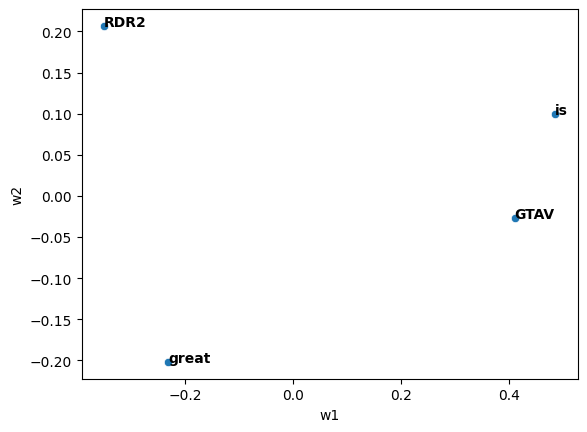

In [6]:
import matplotlib.pyplot as plt

sns.scatterplot(data=df, x="w1", y="w2")
plt.text(df.w1[0], df.w2[0], df.token[0],
         horizontalalignment='left', size='medium', color='black', weight='semibold')
plt.text(df.w1[1], df.w2[1], df.token[1],
         horizontalalignment='left', size='medium', color='black', weight='semibold')
plt.text(df.w1[2], df.w2[2], df.token[2],
         horizontalalignment='left', size='medium', color='black', weight='semibold')
plt.text(df.w1[3], df.w2[3], df.token[3],
         horizontalalignment='left', size='medium', color='black', weight='semibold')
plt.show()

In [7]:
trainer = l.Trainer(max_epochs=100)
trainer.fit(model, train_dataloaders=dataloader)

GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
You are using a CUDA device ('NVIDIA GeForce RTX 4060 Laptop GPU') that has Tensor Cores. To properly utilize them, you should set `torch.set_float32_matmul_precision('medium' | 'high')` which will trade-off precision for performance. For more details, read https://pytorch.org/docs/stable/generated/torch.set_float32_matmul_precision.html#torch.set_float32_matmul_precision
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name         | Type             | Params
--------------------------------------------------
0 | loss         | CrossEntropyLoss | 0     
  | other params | n/a              | 16    
--------------------------------------------------
16        Trainable params
0         Non-trainable params
16        Total params
0.000     Total estimated model params size (MB)
c:\Users\AezersX\anaconda3\envs\pytorch\lib\site-packages\light

Epoch 99: 100%|██████████| 4/4 [00:00<00:00, 166.97it/s, v_num=13]

`Trainer.fit` stopped: `max_epochs=100` reached.


Epoch 99: 100%|██████████| 4/4 [00:00<00:00, 123.93it/s, v_num=13]


In [8]:
data = {
    "w1": [model.input1_w1.item(), 
           model.input2_w1.item(), 
           model.input3_w1.item(), 
           model.input4_w1.item()],
    "w2": [model.input1_w2.item(),
           model.input2_w2.item(),
           model.input3_w2.item(),
           model.input4_w2.item()],
    "token": ["RDR2", "is", "great", "GTAV"],
    "input": ["input1", "input2", "input3", "input4"]
}
df = pd.DataFrame(data)
df

,w1,w2,token,input
0,-1.489533,1.879944,RDR2,input1
1,2.372785,-1.348690,is,input2
2,-1.862550,-1.823253,great,input3
3,-1.316438,2.026536,GTAV,input4


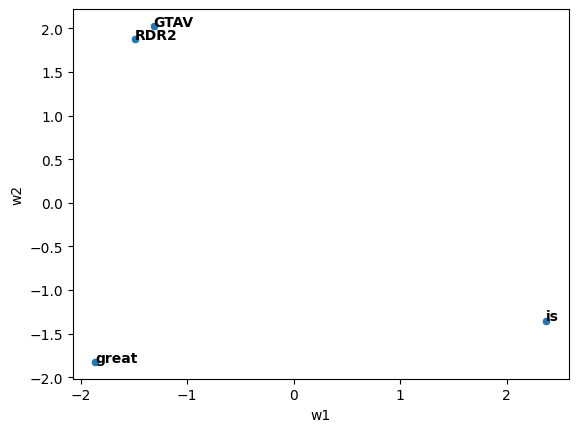

In [9]:
import matplotlib.pyplot as plt

# graph
sns.scatterplot(data=df, x="w1", y="w2")
plt.text(df.w1[0], df.w2[0], df.token[0],
         horizontalalignment='left', size='medium', color='black', weight='semibold')
plt.text(df.w1[1], df.w2[1], df.token[1],
         horizontalalignment='left', size='medium', color='black', weight='semibold')
plt.text(df.w1[2], df.w2[2], df.token[2],
         horizontalalignment='left', size='medium', color='black', weight='semibold')
plt.text(df.w1[3], df.w2[3], df.token[3],
         horizontalalignment='left', size='medium', color='black', weight='semibold')
plt.show()


In [10]:
softmax = nn.Softmax(dim=0)
print(torch.round(softmax(model(torch.tensor([[1.,0.,0.,0.]]))),
      decimals=2))
print(torch.round(softmax(model(torch.tensor([[0.,1.,0.,0.]]))),
        decimals=2))
print(torch.round(softmax(model(torch.tensor([[0.,0.,1.,0.]]))),
        decimals=2))
print(torch.round(softmax(model(torch.tensor([[0.,0.,0.,1.]]))),
        decimals=2))


tensor([0., 1., 0., 0.], grad_fn=<RoundBackward1>)
tensor([0., 0., 1., 0.], grad_fn=<RoundBackward1>)
tensor([0., 0., 0., 1.], grad_fn=<RoundBackward1>)
tensor([0., 1., 0., 0.], grad_fn=<RoundBackward1>)


In [11]:
class WordEmbeddingLinear(l.LightningModule):

    def __init__(self):
        
        super().__init__()
        l.seed_everything(seed=42)
        self.input_to_hidden = nn.Linear(in_features=4, out_features=2, bias=False)
        self.hidden_to_output = nn.Linear(in_features=2, out_features=4, bias=False)
        self.loss = nn.CrossEntropyLoss()
        
        
    def forward(self, input): 
        hidden = self.input_to_hidden(input)
        output_values = self.hidden_to_output(hidden)
                
        return(output_values)
        
        
    def configure_optimizers(self): 
        
        return Adam(self.parameters(), lr=0.1)

    
    def training_step(self, batch, batch_idx): 
        
        input_i, label_i = batch 
        output_i = self.forward(input_i)
        loss = self.loss(output_i, label_i)
        return loss

In [12]:
modellinear = WordEmbeddingLinear()
print("Before otimization, the parameters are:")
for name, param in modellinear.named_parameters():
    print(name, param.data)

Seed set to 42


Before otimization, the parameters are:
input_to_hidden.weight tensor([[ 0.3823,  0.4150, -0.1171,  0.4593],
        [-0.1096,  0.1009, -0.2434,  0.2936]])
hidden_to_output.weight tensor([[ 0.6233, -0.5188],
        [ 0.6146,  0.1323],
        [ 0.5224,  0.0958],
        [ 0.3410, -0.0998]])


In [15]:
data = {
    "w1": modellinear.input_to_hidden.weight.detach()[0].numpy(),
    "w2": modellinear.input_to_hidden.weight.detach()[1].numpy(),
    "token": ["RDR2", "is", "great", "GTAV"],
    "input": ["input1", "input2", "input3", "input4"]
}
dfa = pd.DataFrame(data)
dfa

,w1,w2,token,input
0,0.382269,-0.109552,RDR2,input1
1,0.415004,0.100895,is,input2
2,-0.117136,-0.243428,great,input3
3,0.459306,0.293641,GTAV,input4


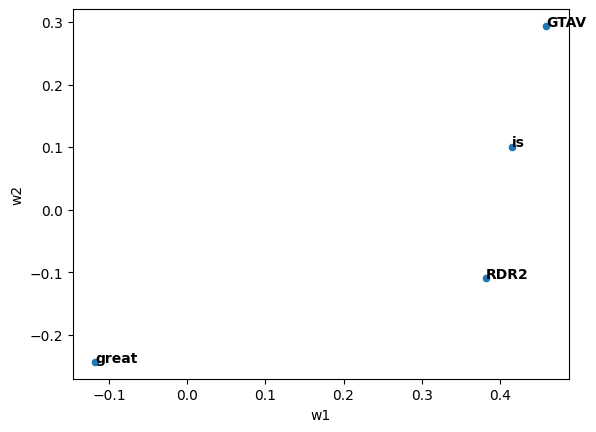

In [17]:
sns.scatterplot(data=dfa, x="w1", y="w2")
plt.text(dfa.w1[0], dfa.w2[0], dfa.token[0],
         horizontalalignment='left', size='medium', color='black', weight='semibold')
plt.text(dfa.w1[1], dfa.w2[1], dfa.token[1],
            horizontalalignment='left', size='medium', color='black', weight='semibold')
plt.text(dfa.w1[2], dfa.w2[2], dfa.token[2],
            horizontalalignment='left', size='medium', color='black', weight='semibold')
plt.text(dfa.w1[3], dfa.w2[3], dfa.token[3],
            horizontalalignment='left', size='medium', color='black', weight='semibold')
plt.show()

In [18]:
trainer = l.Trainer(max_epochs=100)
trainer.fit(modellinear, train_dataloaders=dataloader)


GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name             | Type             | Params
------------------------------------------------------
0 | input_to_hidden  | Linear           | 8     
1 | hidden_to_output | Linear           | 8     
2 | loss             | CrossEntropyLoss | 0     
------------------------------------------------------
16        Trainable params
0         Non-trainable params
16        Total params
0.000     Total estimated model params size (MB)
c:\Users\AezersX\anaconda3\envs\pytorch\lib\site-packages\lightning\pytorch\trainer\connectors\data_connector.py:441: The 'train_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=15` in the `DataLoader` to improve performance.
c:\Users\AezersX\anaconda3\envs\pytorch\lib\site-

Epoch 99: 100%|██████████| 4/4 [00:00<00:00, 246.85it/s, v_num=14]

`Trainer.fit` stopped: `max_epochs=100` reached.


Epoch 99: 100%|██████████| 4/4 [00:00<00:00, 185.25it/s, v_num=14]


In [19]:
print("After optimization, the parameters are...")
for name, param in modellinear.named_parameters():
    print(name, param.data)

After optimization, the parameters are...
input_to_hidden.weight tensor([[ 2.5104, -1.0176, -1.9742,  2.4355],
        [-0.0688,  2.4824, -1.8189, -0.2228]])
hidden_to_output.weight tensor([[-0.3022, -1.0102],
        [ 3.2008, -0.3850],
        [-0.6693,  2.1813],
        [-2.6841, -2.9578]])


In [21]:
data = {
    "w1": modellinear.input_to_hidden.weight.detach()[0].numpy(),
    "w2": modellinear.input_to_hidden.weight.detach()[1].numpy(),
    "token": ["RDR2", "is", "great", "GTAV"],
    "input": ["input1", "input2", "input3", "input4"]
}
dfb= pd.DataFrame(data)
dfb

,w1,w2,token,input
0,2.510441,-0.068819,RDR2,input1
1,-1.017648,2.482439,is,input2
2,-1.974155,-1.818942,great,input3
3,2.435518,-0.222802,GTAV,input4


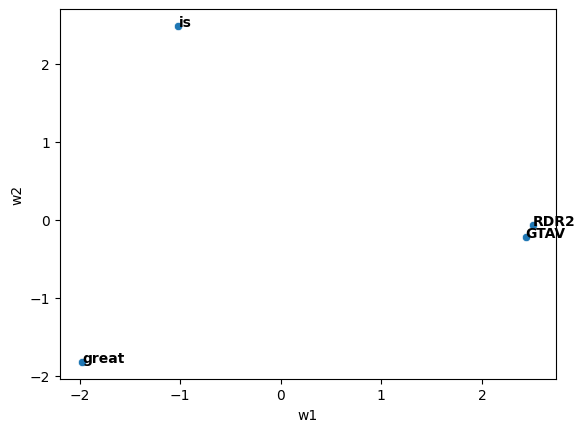

In [22]:

sns.scatterplot(data=dfb, x="w1", y="w2")
plt.text(dfb.w1[0], dfb.w2[0], dfb.token[0],
         horizontalalignment='left', size='medium', color='black', weight='semibold')
plt.text(dfb.w1[1], dfb.w2[1], dfb.token[1],
            horizontalalignment='left', size='medium', color='black', weight='semibold')
plt.text(dfb.w1[2], dfb.w2[2], dfb.token[2],
            horizontalalignment='left', size='medium', color='black', weight='semibold')
plt.text(dfb.w1[3], dfb.w2[3], dfb.token[3],
            horizontalalignment='left', size='medium', color='black', weight='semibold')
plt.show()

Load embedding model

In [24]:
word_embedding = nn.Embedding.from_pretrained(modellinear.input_to_hidden.weight.T)

In [27]:
word_embedding(torch.tensor([0]))

tensor([[ 2.5104, -0.0688]])

In [28]:
vocab = {
    "RDR2": 0,
    "is": 1,
    "great": 2,
    "GTAV": 3
}
word_embedding(torch.tensor([vocab["RDR2"]]))

tensor([[ 2.5104, -0.0688]])